In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
customer_data = pd.read_csv("Customers.csv")
products_data = pd.read_csv("Products.csv")
transaction_data = pd.read_csv("Transactions.csv")


In [117]:
print("Dataset Information:")
print("Customer Data")
print("*"*50)
print(customer_data.info())
print("Product Data")
print("*"*50)
print(products_data.info())
print("Transactions Data")
print("*"*50)
print(transaction_data.info())

Dataset Information:
Customer Data
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
Product Data
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
Transactions Data
*******************

In [131]:
print("\nSummary Statistics:")

print("\nCustomer Data")
print("*"*50)
print(customer_data.describe(include='all'))

print("\nProduct Data")
print("*"*50)
print(products_data.describe(include='all'))

print("\nTransactions Data")
print("*"*50)
print(transaction_data.describe(include='all'))


Summary Statistics:

Customer Data
**************************************************
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Product Data
**************************************************
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      

In [135]:
print("\nMissing Values: Customer data")
print(customer_data.isnull().sum())

print("\nMissing Values: Product data")
print(products_data.isnull().sum())

print("\nMissing Values: Transactions data")
print(transaction_data.isnull().sum())


Missing Values: Customer data
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values: Product data
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values: Transactions data
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


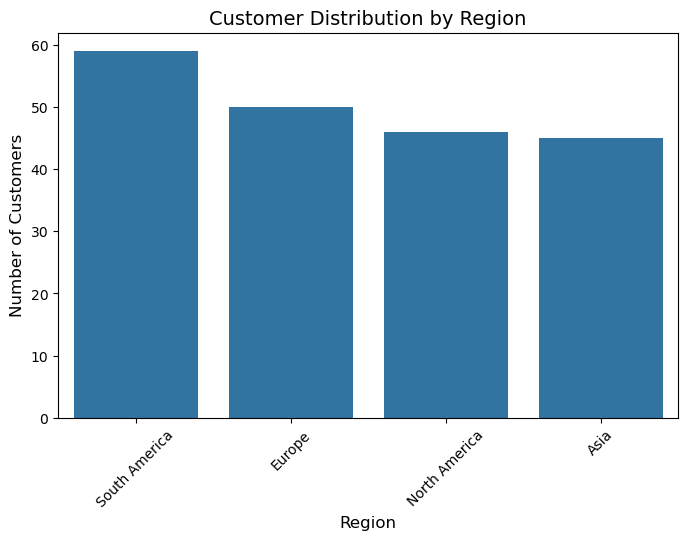

In [157]:
customer_data['SignupDate'] = pd.to_datetime(customer_data['SignupDate'])
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_data, x='Region',legend=False, order=customer_data['Region'].value_counts().index)
plt.title('Customer Distribution by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

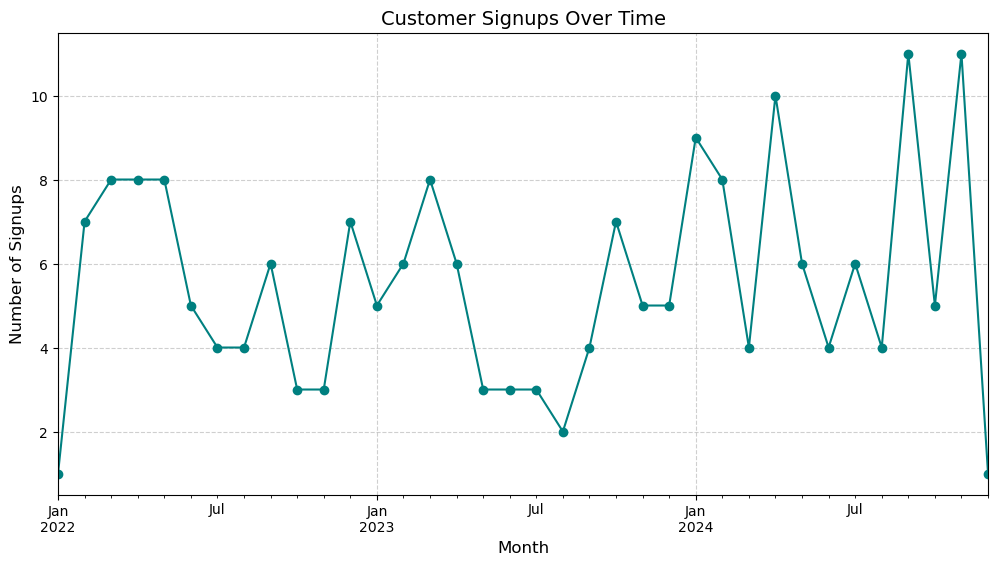

In [147]:
customer_data['SignupMonth'] = customer_data['SignupDate'].dt.to_period('M')
signup_trend = customer_data['SignupMonth'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
signup_trend.plot(kind='line', marker='o', color='teal')
plt.title('Customer Signups Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [95]:
customer_data.nunique()

CustomerID      200
CustomerName    200
Region            4
SignupDate      179
dtype: int64

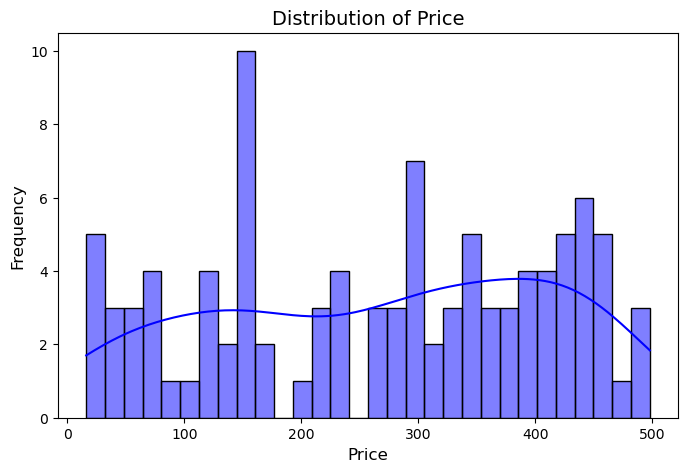

In [163]:
numerical_columns = products_data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(products_data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

In [165]:
products_data.nunique()

ProductID      100
ProductName     66
Category         4
Price          100
dtype: int64

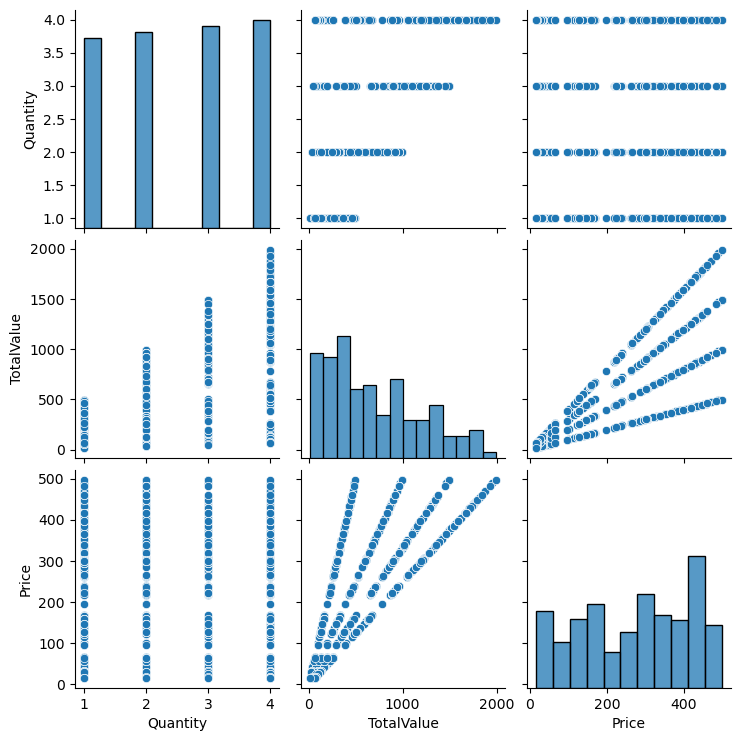

In [177]:

sns.pairplot(transaction_data)

In [179]:
transaction_data.nunique()

TransactionID      1000
CustomerID          199
ProductID           100
TransactionDate    1000
Quantity              4
TotalValue          369
Price               100
dtype: int64